In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [92]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


In [93]:
#Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and 
#Latitude

In [94]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, #
        # country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | polyarnyy
Processing Record 2 of Set 1 | linyi
Processing Record 3 of Set 1 | floral city
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | santa luzia
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | maragogi
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | wanlaweyn
Processing Record 11 of Set 1 | massenya
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | port saint john's
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | mburucuya
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | ust-nera
Processing Record 23 of Set 1 

In [151]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [152]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,polyarnyy,69.1989,33.4478,-0.93,72,0,9.58,RU,1682409403
1,linyi,35.0631,118.3428,15.76,59,90,5.24,CN,1682409129
2,floral city,28.7500,-82.2968,20.01,97,78,2.55,US,1682409404
3,west island,-12.1568,96.8225,28.99,74,75,8.75,CC,1682409404
4,santa luzia,-19.7697,-43.8514,18.50,77,0,2.06,BR,1682409404


In [153]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [154]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,polyarnyy,69.1989,33.4478,-0.93,72,0,9.58,RU,1682409403
1,linyi,35.0631,118.3428,15.76,59,90,5.24,CN,1682409129
2,floral city,28.7500,-82.2968,20.01,97,78,2.55,US,1682409404
3,west island,-12.1568,96.8225,28.99,74,75,8.75,CC,1682409404
4,santa luzia,-19.7697,-43.8514,18.50,77,0,2.06,BR,1682409404


In [155]:
# Create the Scatter Plots

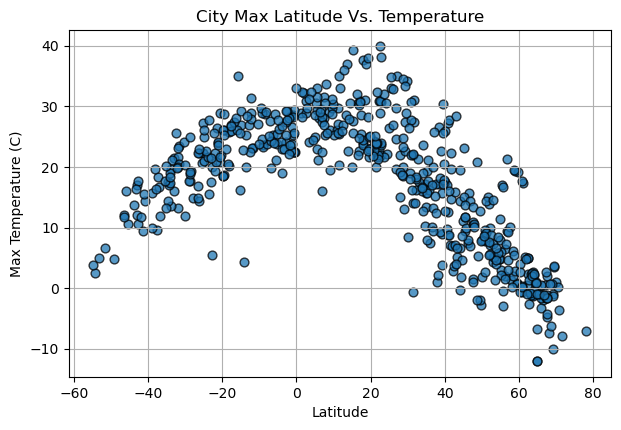

In [156]:
# Latitude Vs. Temperature 

# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(7,4.5), 
                  title="City Max Latitude Vs. Temperature", edgecolors="black", 
                  s=40, alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

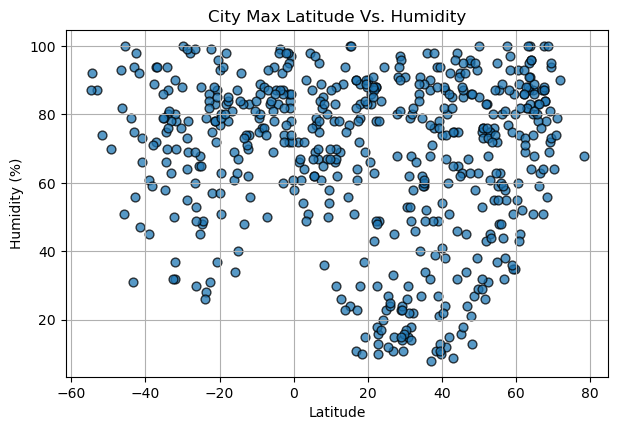

In [157]:
# Latitude Vs. Temperature 

# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(7,4.5), 
                  title="City Max Latitude Vs. Humidity", edgecolors="black", 
                  s=40, alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

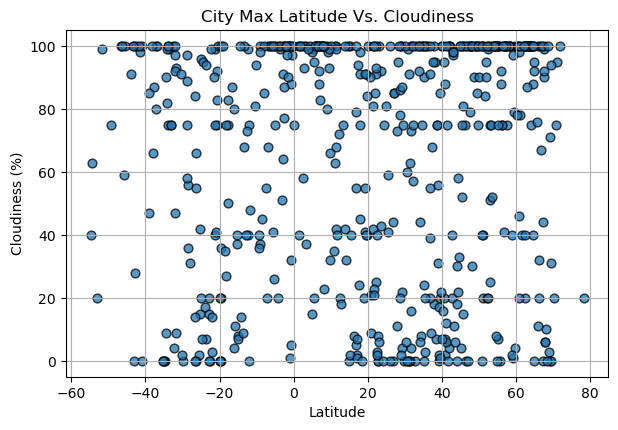

In [158]:
# Latitude Vs. Cloudiness

# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(7,4.5), 
                  title="City Max Latitude Vs. Cloudiness", edgecolors="black", 
                  s=40, alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

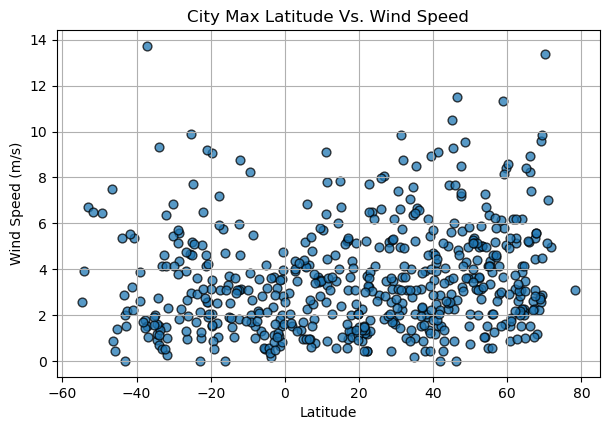

In [159]:
# Latitude Vs. Wind Speed Plot

# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(7,4.5), 
                  title="City Max Latitude Vs. Wind Speed", edgecolors="black", 
                  s=40, alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [160]:
# Requirement 2: Compute Linear Regression for Each Relationship

In [161]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,polyarnyy,69.1989,33.4478,-0.93,72,0,9.58,RU,1682409403
1,linyi,35.0631,118.3428,15.76,59,90,5.24,CN,1682409129
2,floral city,28.7500,-82.2968,20.01,97,78,2.55,US,1682409404
7,kodiak,57.7900,-152.4072,1.43,77,100,2.93,US,1682409405
9,wanlaweyn,2.6185,44.8938,30.96,54,58,3.94,SO,1682409405


In [162]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,west island,-12.1568,96.8225,28.99,74,75,8.75,CC,1682409404
4,santa luzia,-19.7697,-43.8514,18.50,77,0,2.06,BR,1682409404
5,adamstown,-25.0660,-130.1015,24.97,88,96,5.17,PN,1682409121
6,maragogi,-9.0122,-35.2225,23.71,89,37,2.02,BR,1682409405
8,waitangi,-43.9535,-176.5597,13.79,79,91,5.36,NZ,1682409405


The r-value is: -0.8605974202465593
y = -0.52x + 35.14


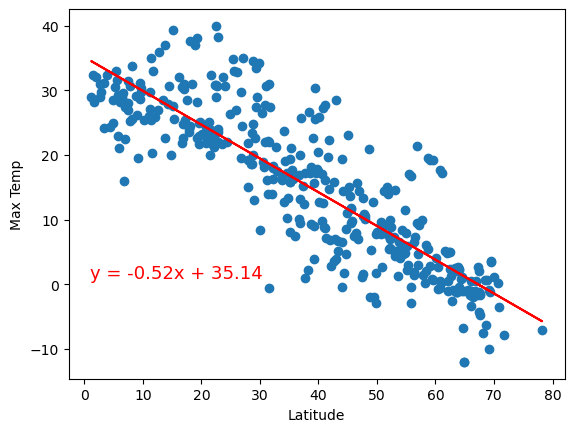

In [163]:
# Temperature vs. Latitude Linear Regression Plot

# Linear regression on Northern Hemisphere
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values1 = northern_hemi_df["Lat"] * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],regress_values1,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq1,(1,1),fontsize=13,color="red")
print(f"The r-value is: {rvalue1}")
print(f"{line_eq1}")

The r-value is: 0.7379188276523684
y = 0.33x + 28.26


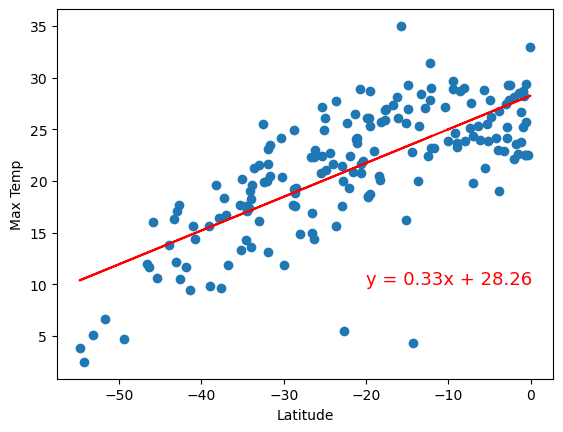

In [164]:
# Temperature vs. Latitude Linear Regression Plot

# Linear regression on Southern Hemisphere
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values2 = southern_hemi_df["Lat"] * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],regress_values2,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq2,(-20,10),fontsize=13,color="red")
print(f"The r-value is: {rvalue2}")
print(f"{line_eq2}")

Discussion about the linear relationship 

In the Northern Hemisphere the slope is -0.52, indicating a negative correlation between latitude and maximum temperature. The r-value of 0.86 indicates a strong correlation which suggests latitude is a good predictor of maximum temperature in the Northern Hemisphere. 

In comparison, in the Southern Hemisphere the regression line has a positive slope of 0.33 indicating a positive correlation between latitude and maximum temperature. The r-value of 0.74 is indicative of a strong correlation but is weaker than the Northern Hemisphere. As such latitude is still a good predictor of maximum temperature in the Southern Hemisphere but not as good as the Northern Hemisphere. 

The r-value is: 0.1295954710337551
y = 0.17x + 58.17


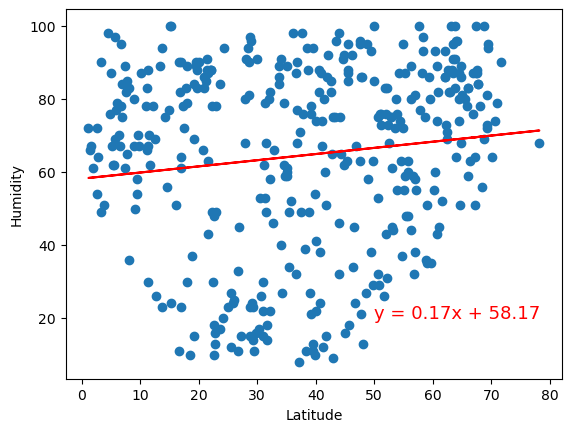

In [165]:
# Humidity vs. Latitude Linear Regression Plot

# Linear regression on Northern Hemisphere
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values3 = northern_hemi_df["Lat"] * slope3 + intercept3
line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"],regress_values3,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq3,(50,20),fontsize=13,color="red")
print(f"The r-value is: {rvalue3}")
print(f"{line_eq3}")

The r-value is: 0.14695203143307772
y = 0.18x + 78.56


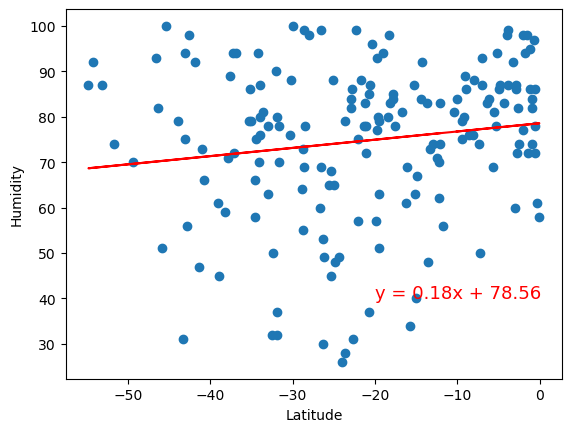

In [166]:
# Humidity vs. Latitude Linear Regression Plot

# Linear regression on Southern Hemisphere
(slope4, intercept4, rvalue4, pvalue4, stderr4) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values4 = southern_hemi_df["Lat"] * slope4 + intercept4
line_eq4 = "y = " + str(round(slope4,2)) + "x + " + str(round(intercept4,2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"],regress_values4,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq4,(-20,40),fontsize=13,color="red")
print(f"The r-value is: {rvalue4}")
print(f"{line_eq4}")

Discussion about the linear relationship 

The Northern Hemisphere and Southern Hemisphere have similar slopes of 0.13 and 0.15 respectively indicating a positive correlation between latitude and humidity. The r-value of 0.017 and 0.022 for the Northern and Southern Hemisphere indicates no correlation / a very weak correlation suggesting latitude isn't a good predictor of humidity in both hemispheres. 

The r-value is: 0.02592792765502063
y = 0.05x + 61.83


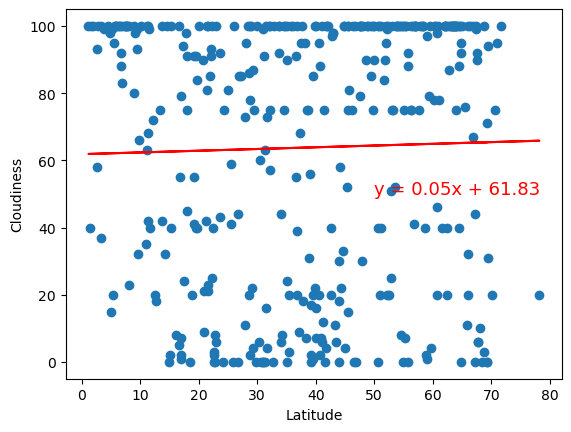

In [167]:
# Cloudiness vs. Latitude Linear Regression Plot

# Linear regression on Northern Hemisphere
(slope5, intercept5, rvalue5, pvalue5, stderr5) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values5 = northern_hemi_df["Lat"] * slope5 + intercept5
line_eq5 = "y = " + str(round(slope5,2)) + "x + " + str(round(intercept5,2))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"],regress_values5,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq5,(50,50),fontsize=13,color="red")
print(f"The r-value is: {rvalue5}")
print(f"{line_eq5}")

The r-value is: 0.07723888605006655
y = 0.21x + 65.99


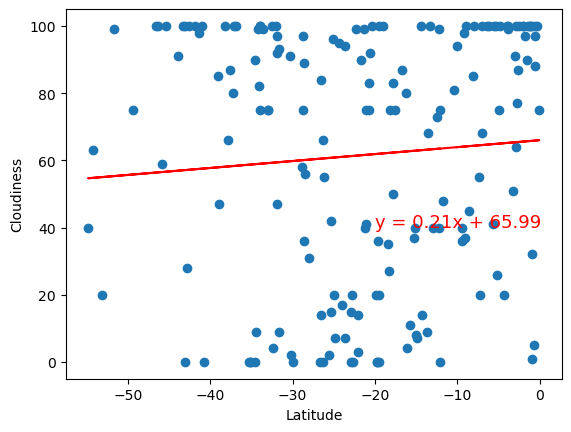

In [168]:
# Cloudiness vs. Latitude Linear Regression Plot

# Linear regression on Southern Hemisphere
(slope6, intercept6, rvalue6, pvalue6, stderr6) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values6 = southern_hemi_df["Lat"] * slope6 + intercept6
line_eq6 = "y = " + str(round(slope6,2)) + "x + " + str(round(intercept6,2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],regress_values6,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq6,(-20,40),fontsize=13,color="red")
print(f"The r-value is: {rvalue6}")
print(f"{line_eq6}")

Discussion about the linear relationship 

The Northern Hemisphere and Southern Hemisphere have slopes of 0.05 and 0.21 respectively 
indicating a positive correlation between latitude and humidity. The r-value of 0.026 and 0.077 for the Northern and Southern Hemisphere indicates no correlation / a very weak correlation suggesting latitude isn't a good predictor of cloudiness in both hemispheres. 

The r-value is: 0.16128702433999112
y = 0.02x + 3.01


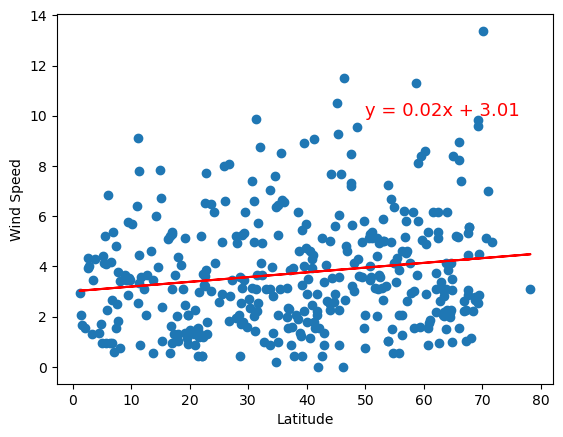

In [169]:
# Wind Speed vs. Latitude Linear Regression Plot

# Linear regression on Northern Hemisphere
(slope7, intercept7, rvalue7, pvalue7, stderr7) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values7 = northern_hemi_df["Lat"] * slope7 + intercept7
line_eq7 = "y = " + str(round(slope7,2)) + "x + " + str(round(intercept7,2))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"],regress_values7,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq7,(50,10),fontsize=13,color="red")
print(f"The r-value is: {rvalue7}")
print(f"{line_eq7}")

The r-value is: -0.1722239788516148
y = -0.03x + 2.45


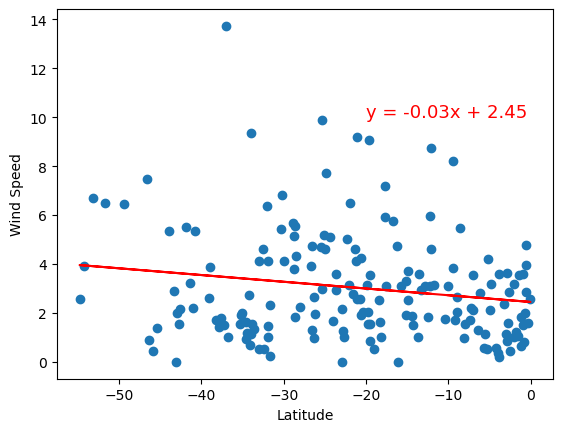

In [170]:
# Wind Speed vs. Latitude Linear Regression Plot

# Linear regression on Southern Hemisphere
(slope8, intercept8, rvalue8, pvalue8, stderr8) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values8 = southern_hemi_df["Lat"] * slope8 + intercept8
line_eq8 = "y = " + str(round(slope8,2)) + "x + " + str(round(intercept8,2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],regress_values8,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq8,(-20,10),fontsize=13,color="red")
print(f"The r-value is: {rvalue8}")
print(f"{line_eq8}")

Discussion about the linear relationship 

In the Northern Hemisphere the slope is 0.02, indicating a positive correlation between latitude and wind speed. In comparison for the Southern Hemisphere the regression line has a negative slope of -0.03 indicating a negative correlation between latitude and maximum temperature. Both hemispheres have r-values of 0.16 and -0.17 respectively, indicating little to no correlation. This suggests latitude isn't a good predictor of wind speed in both hemispheres. 